In [3]:
import numpy as np
import cv2
import glob
import os 


In [4]:
stopping_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 45, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
ObjectPoints = [] # 3d point in real world space
ImagePoints = [] # 2d points in image plane.



In [5]:
basefolder= r'C:\Users\mbhattac\OneDrive - HERE Global B.V-\coding\opencv_book\Chapter09\Section4\images\\'

os.chdir(basefolder)


In [6]:
images = glob.glob(basefolder + "*.jpg")


In [7]:
images

['C:\\Users\\mbhattac\\OneDrive - HERE Global B.V-\\coding\\opencv_book\\Chapter09\\Section4\\images\\Clipped Image.jpg',
 'C:\\Users\\mbhattac\\OneDrive - HERE Global B.V-\\coding\\opencv_book\\Chapter09\\Section4\\images\\Image wth chess board pattern.jpg',
 'C:\\Users\\mbhattac\\OneDrive - HERE Global B.V-\\coding\\opencv_book\\Chapter09\\Section4\\images\\left01.jpg',
 'C:\\Users\\mbhattac\\OneDrive - HERE Global B.V-\\coding\\opencv_book\\Chapter09\\Section4\\images\\left02.jpg',
 'C:\\Users\\mbhattac\\OneDrive - HERE Global B.V-\\coding\\opencv_book\\Chapter09\\Section4\\images\\left03.jpg',
 'C:\\Users\\mbhattac\\OneDrive - HERE Global B.V-\\coding\\opencv_book\\Chapter09\\Section4\\images\\left04.jpg',
 'C:\\Users\\mbhattac\\OneDrive - HERE Global B.V-\\coding\\opencv_book\\Chapter09\\Section4\\images\\left05.jpg',
 'C:\\Users\\mbhattac\\OneDrive - HERE Global B.V-\\coding\\opencv_book\\Chapter09\\Section4\\images\\left06.jpg',
 'C:\\Users\\mbhattac\\OneDrive - HERE Global B.V-

In [8]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    status, inner_corners = cv2.findChessboardCorners(gray, (7,6),None)

    # If found, add object points, image points (after refining them)
    if status == True:
        ObjectPoints.append(objp)

        refined_corners = cv2.cornerSubPix(gray,inner_corners ,(13,13),(-1,-1),stopping_criteria )
        ImagePoints.append(refined_corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), refined_corners,status)
        #cv2.imshow('img',img)
        #cv2.waitKey(500)
        cv2.imwrite('Image wth chess board pattern.jpg',img )


In [9]:
cv2.destroyAllWindows()


In [10]:
caliberation_error, camera_matrix, distortion_coff, rvecs, tvecs = cv2.calibrateCamera(ObjectPoints, ImagePoints, gray.shape[::-1],None,None)

# select a sample image & display it 
sample_image = cv2.imread(basefolder+ "left12.jpg")
cv2.imshow('Sample Image',sample_image )
cv2.imwrite('Sample Image.jpg',sample_image )
h,  w = sample_image.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(camera_matrix,distortion_coff,(w,h),0.8,(w,h))


In [11]:
# undistort
undistorted_sample_image= cv2.undistort(sample_image, camera_matrix, distortion_coff, None, newcameramtx)
cv2.imshow('Undistorted Image',undistorted_sample_image )
cv2.imwrite('Undistorted Image.jpg',undistorted_sample_image )


True

In [12]:
# crop the image
x,y,w,h = roi
clipped_sample_image = undistorted_sample_image[y:y+h, x:x+w]
cv2.imshow('Clipped Image',clipped_sample_image )
cv2.imwrite('Clipped Image.jpg',clipped_sample_image )



True

In [13]:
# undistort it using another method 
mapx,mapy = cv2.initUndistortRectifyMap(camera_matrix,distortion_coff,None,newcameramtx,(w,h),5)
undistorted_new = cv2.remap(clipped_sample_image,mapx,mapy,cv2.INTER_LINEAR)


In [14]:
# crop the image
x,y,w,h = roi
undistorted_new = undistorted_new[y:y+h, x:x+w]
cv2.imshow('Second undistorted Image',undistorted_new  )
cv2.imwrite('Second undistorted Image.jpg',undistorted_new  )


True

In [15]:
cv2.destroyAllWindows()


In [16]:
from cv2 import aruco

In [17]:
arucoParams = aruco.DetectorParameters_create()
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)


In [18]:
markerLength = 1
markerSeparation = 0.5
targetwidth = 4
targetheight = 4


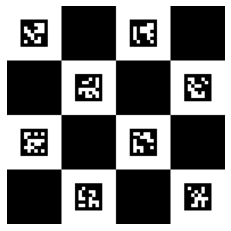

In [19]:
board = aruco.CharucoBoard_create(targetwidth, targetheight, markerLength, markerSeparation, aruco_dict)
imboard = board.draw((1000, 1000))
handle = plt.imshow(imboard,cmap='gray')
plt.axis('off')
plt.savefig(basefolder + "/charuco_markers.png")


In [ ]:
camera = cv2.VideoCapture(0)


In [ ]:
while True:
    status, img_charuco = camera.read()
    im_gray = cv2.cvtColor(img_charuco ,cv2.COLOR_RGB2GRAY)
    h,  w = im_gray.shape[:2]
    dst = cv2.undistort(im_gray, camera_matrix, distortion_coff, None, newcameramtx)
    corners, ids, rejectedImgPoints = aruco.detectMarkers(dst, aruco_dict, parameters=arucoParams)
    cv2.imshow("original", im_gray)
    
    if not corners :
        print ("pass")
    else:
        aruco.refineDetectedMarkers(im_gray, board, corners, ids, rejectedImgPoints)
        charucoretval, charucoCorners, charucoIds = aruco.interpolateCornersCharuco(corners, ids, im_gray, board)
        image_with_charuco_board = aruco.drawDetectedCornersCharuco(img_charuco, charucoCorners, charucoIds, (0,255,0))
        status , rvec, tvec = aruco.estimatePoseCharucoBoard(charucoCorners, charucoIds, board, camera_matrix, distortion_coff)         
        if status != 0:
            img_aruco = aruco.drawAxis(image_with_charuco_board, newcameramtx, distortion_coff, rvec, tvec,20)
        else:
            print('no markers detected')
            
    if cv2.waitKey(0) & 0xFF == ord('q'):
        cv2.imwrite(base_folder + 'detected charuco pattern.jpg', img_charuco)
        break;
        
    cv2.imshow("World co-ordinate frame axes", img_charuco)


In [ ]:
camera.release()
cv2.destroyAllWindows()